In [273]:
import pandas as pd
import tensorflow as tf
import numpy as np
import scipy.io
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import metrics
from keras.layers.core import Dense, Activation
import pandas

In [274]:
data_info = pandas.read_csv("NUSW-NB15_features.csv", encoding = "ISO-8859-1", header=None).values
features = data_info[:]
feature_names = features[:, 1]  # Names of the features in a list
feature_types = np.array([item.lower() for item in features[:, 2]])  # The types of the corresponding features in 'features_names'
 

In [275]:
# index arrays for different types of features
#nominal_cols = np.where(feature_types == "nominal")[0]
#integer_cols = np.where(feature_types == "integer")[0]
#binary_cols = np.where(feature_types == "binary")[0]
#float_cols = np.where(feature_types == "float")[0]



In [276]:
# arrays for names of the different types of features
#nominal_names = feature_names[nominal_cols]
#integer_names = feature_names[integer_cols]
#binary_names = feature_names[binary_cols]
#float_names = feature_names[float_cols]

In [277]:
dataframe1 = pandas.read_csv("UNSW.csv"       , names = feature_names, encoding = "ISO-8859-1", header=None)
dataframe2 = pandas.read_csv("UNSW-NB15_2.csv", names = feature_names, encoding = "ISO-8859-1",header=None)
dataframe3 = pandas.read_csv("UNSW-NB15_3.csv", names = feature_names,   encoding = "ISO-8859-1",header=None)
dataframe4 = pandas.read_csv("UNSW-NB15_4.csv",  names = feature_names,  encoding = "ISO-8859-1",header=None)

In [278]:
#concat

dataframe = pandas.concat([dataframe1, dataframe2, dataframe3, dataframe4])

del dataframe1
del dataframe2
del dataframe3
del dataframe4

In [279]:
dataframe[0:5]

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,1,srcip,nominal,Source IP address,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,sport,integer,Source port number,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,dstip,nominal,Destination IP address,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,dsport,integer,Destination port number,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,proto,nominal,Transaction protocol,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [280]:
dataframe['ct_dst_sport_ltm'] = dataframe['ct_dst_sport_ltm'].replace(np.nan,0, regex=True)
dataframe['ackdat'] = dataframe['ackdat'].replace(np.nan, 0, regex=True)
dataframe['ct_flw_http_mthd'] = dataframe['ct_flw_http_mthd'].replace(np.nan, 0, regex=True)
dataframe['ct_state_ttl'] = dataframe['ct_state_ttl'].replace(np.nan, 0, regex=True)
dataframe['ct_flw_http_mthd'] = dataframe['ct_flw_http_mthd'].replace(np.nan, 0, regex=True)
dataframe['is_ftp_login'] = dataframe['is_ftp_login'].replace(np.nan, 0, regex=True)
dataframe[0:5]

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,1,srcip,nominal,Source IP address,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1,2,sport,integer,Source port number,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2,3,dstip,nominal,Destination IP address,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
3,4,dsport,integer,Destination port number,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4,5,proto,nominal,Transaction protocol,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [281]:
dataframe['attack_cat'] = dataframe['attack_cat'].replace(np.nan, 'Normal', regex=True)
dataframe['Label'] = dataframe['Label'].replace(np.nan, 0, regex=True)


x = dataframe

In [282]:
x = x.dropna()
assert pd.isnull(x).sum().sum() == 0
assert pd.isna(x).sum().sum() == 0

In [283]:
x

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.0,6055,149.171.126.5,54145,tcp,FIN,0.072974,4238.0,60788.0,31.0,...,0,13.0,13.0,6.0,7.0,1.0,1.0,2.0,Normal,0.0
1,59.166.0.0,7832,149.171.126.3,5607,tcp,FIN,0.144951,5174.0,91072.0,31.0,...,0,13.0,13.0,6.0,7.0,1.0,1.0,2.0,Normal,0.0
2,59.166.0.8,11397,149.171.126.6,21,tcp,FIN,0.116107,2934.0,3742.0,31.0,...,1,1.0,2.0,7.0,5.0,1.0,1.0,4.0,Normal,0.0
3,59.166.0.0,3804,149.171.126.3,53,udp,CON,0.000986,146.0,178.0,31.0,...,0,13.0,13.0,6.0,7.0,1.0,1.0,2.0,Normal,0.0
4,59.166.0.8,14339,149.171.126.6,14724,tcp,FIN,0.038480,8928.0,320.0,31.0,...,0,8.0,20.0,7.0,5.0,1.0,1.0,4.0,Normal,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440039,59.166.0.5,33094,149.171.126.7,43433,tcp,FIN,0.087306,320.0,1828.0,31.0,...,,1.0,2.0,3.0,3.0,1.0,1.0,3.0,Normal,0.0
440040,59.166.0.7,20848,149.171.126.4,21,tcp,CON,0.365058,456.0,346.0,31.0,...,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,Normal,0.0
440041,59.166.0.3,21511,149.171.126.9,21,tcp,CON,6.335154,1802.0,2088.0,31.0,...,2,2.0,2.0,4.0,2.0,2.0,2.0,2.0,Normal,0.0
440042,59.166.0.9,35433,149.171.126.0,80,tcp,CON,2.200934,3498.0,166054.0,31.0,...,,1.0,1.0,2.0,4.0,2.0,2.0,2.0,Normal,0.0


In [286]:
# seperate outcome & feature

y = x[['Label']]
x = x.drop(['Label','srcip','dstip','proto','state','attack_cat','service','dsport','ct_ftp_cmd','sport'], axis = 1)

#y['Label'] = y['Label'].replace(np.nan, 0, regex=True)

In [287]:
x.shape

(1840046, 39)

In [288]:
y.shape

(1840046, 1)

In [269]:
x[0:5]

,sport,dsport,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Sload,...,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm
0,6055,54145,0.072974,4238.0,60788.0,31.0,29.0,7.0,30.0,4.582454e+05,...,0.0,0.0,0,13.0,13.0,6.0,7.0,1.0,1.0,2.0
1,7832,5607,0.144951,5174.0,91072.0,31.0,29.0,7.0,39.0,2.824127e+05,...,0.0,0.0,0,13.0,13.0,6.0,7.0,1.0,1.0,2.0
2,11397,21,0.116107,2934.0,3742.0,31.0,29.0,11.0,15.0,1.982998e+05,...,0.0,1.0,1,1.0,2.0,7.0,5.0,1.0,1.0,4.0
3,3804,53,0.000986,146.0,178.0,31.0,29.0,0.0,0.0,5.922921e+05,...,0.0,0.0,0,13.0,13.0,6.0,7.0,1.0,1.0,2.0
4,14339,14724,0.038480,8928.0,320.0,31.0,29.0,4.0,1.0,1.723701e+06,...,0.0,0.0,0,8.0,20.0,7.0,5.0,1.0,1.0,4.0


In [289]:
#dummies = pd.get_dummies(x['srcip'], ['dstip'],['proto'],['state'],['attack_cat'],['service'])

#x = x.drop(['srcip','dstip','proto','state','attack_cat','service'], axis = 1)

#x = x.join(dummies)

In [290]:
x

,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Sload,Dload,Spkts,...,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm
0,0.072974,4238.0,60788.0,31.0,29.0,7.0,30.0,4.582454e+05,6.571546e+06,72.0,...,0.0,0.0,0.0,13.0,13.0,6.0,7.0,1.0,1.0,2.0
1,0.144951,5174.0,91072.0,31.0,29.0,7.0,39.0,2.824127e+05,4.971776e+06,90.0,...,0.0,0.0,0.0,13.0,13.0,6.0,7.0,1.0,1.0,2.0
2,0.116107,2934.0,3742.0,31.0,29.0,11.0,15.0,1.982998e+05,2.530769e+05,52.0,...,0.0,0.0,1.0,1.0,2.0,7.0,5.0,1.0,1.0,4.0
3,0.000986,146.0,178.0,31.0,29.0,0.0,0.0,5.922921e+05,7.221095e+05,2.0,...,0.0,0.0,0.0,13.0,13.0,6.0,7.0,1.0,1.0,2.0
4,0.038480,8928.0,320.0,31.0,29.0,4.0,1.0,1.723701e+06,5.550936e+04,14.0,...,0.0,0.0,0.0,8.0,20.0,7.0,5.0,1.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440039,0.087306,320.0,1828.0,31.0,29.0,1.0,2.0,2.446567e+04,1.466108e+05,6.0,...,0.0,0.0,0.0,1.0,2.0,3.0,3.0,1.0,1.0,3.0
440040,0.365058,456.0,346.0,31.0,29.0,2.0,2.0,8.743816e+03,6.333240e+03,8.0,...,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
440041,6.335154,1802.0,2088.0,31.0,29.0,7.0,9.0,2.204840e+03,2.549583e+03,32.0,...,0.0,0.0,2.0,2.0,2.0,4.0,2.0,2.0,2.0,2.0
440042,2.200934,3498.0,166054.0,31.0,29.0,2.0,57.0,1.249651e+04,5.983751e+05,58.0,...,0.0,2.0,0.0,1.0,1.0,2.0,4.0,2.0,2.0,2.0


In [291]:
#Turn categorical data into intergers of 0 & 1 

#dummies = pd.get_dummies(x['srcip'],['sport'],['dstip'],['dsport'],['proto'],['state'])

#drop as column is now encoded
#x = x.drop(['srcip','sport','dstip','dsport', 'proto','state'], axis = 1)

#concat dummy values to the dataframe

#x = x.join(dummies)


#x[0:5]

In [292]:
#drop the last two dummies
#dummy variable trap

#x = x.drop(["['sport']['dstip']nan","['sport']['dstip']3.0"], axis = 1)


In [293]:


# Get column names first
names = x.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit data on the scaler object
scaled_df = scaler.fit_transform(x)
new_scaled_df = pd.DataFrame(scaled_df, columns=names)

x = pd.DataFrame(new_scaled_df)

x[0:5]

,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Sload,Dload,Spkts,...,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm
0,-0.148199,0.002546,0.192241,-0.498504,-0.027942,0.096005,0.293530,-0.360808,1.058229,0.562885,...,-0.441508,-0.214585,-0.125475,0.223302,0.236570,-0.142880,-0.082035,-0.493544,-0.487799,-0.520405
1,-0.127200,0.018093,0.393768,-0.498504,-0.027942,0.096005,0.463184,-0.362123,0.667595,0.804531,...,-0.441508,-0.214585,-0.125475,0.223302,0.236570,-0.142880,-0.082035,-0.493544,-0.487799,-0.520405
2,-0.135615,-0.019112,-0.187376,-0.498504,-0.027942,0.264447,0.010773,-0.362752,-0.484623,0.294389,...,-0.441508,-0.214585,7.485034,-0.762707,-0.664815,-0.033704,-0.300722,-0.493544,-0.487799,-0.363131
3,-0.169200,-0.065419,-0.211093,-0.498504,-0.027942,-0.198767,-0.271984,-0.359806,-0.370094,-0.376851,...,-0.441508,-0.214585,-0.125475,0.223302,0.236570,-0.142880,-0.082035,-0.493544,-0.487799,-0.520405
4,-0.158262,0.080444,-0.210148,-0.498504,-0.027942,-0.030326,-0.253134,-0.351349,-0.532865,-0.215754,...,-0.441508,-0.214585,-0.125475,-0.187535,0.810178,-0.033704,-0.300722,-0.493544,-0.487799,-0.363131


In [296]:
y

,Label
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
440039,0.0
440040,0.0
440041,0.0
440042,0.0


In [297]:
#Turned Malicsious into True, Normal into false

y['Target'] = y['Label'] != 0
y = y.drop('Label', axis=1)

/Users/akhilprasad/miniconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [298]:
y

,Target
0,False
1,False
2,False
3,False
4,False
...,...
440039,False
440040,False
440041,False
440042,False


In [299]:
# Turn Outcomes into dummy variables 

dummies = pd.get_dummies(y['Target'])

# This will turn BENIGN values into 1 being False and all malicious packets into 0 being True. 
y = dummies.values

print(y)

[[1 0]
 [1 0]
 [1 0]
 ...
 [1 0]
 [1 0]
 [0 1]]


(1840046, 2)

In [302]:
#Perform PCA to reduce dimensionality of feature vector for better accuracy
#reduce from 37 to 2 dimensional space

pca=PCA(n_components = 2)
pca.fit(x)
x_scaled = pca.transform(x)
print ("Original Shape:   ", x.shape)
print ("Transformed Shape:",x_scaled.shape)

x = x_scaled

print(x)

Original Shape:    (1840046, 39)
Transformed Shape: (1840046, 2)
[[ 1.95182021  0.62338205]
 [ 2.3997368   1.07932185]
 [ 2.47103262 -0.69258324]
 ...
 [ 1.62157254 -0.79813264]
 [ 3.55823366  2.39452754]
 [ 1.95402336 -1.64504791]]


In [303]:
x.shape

(1840046, 2)

In [304]:
y.shape

(1840046, 2)

In [305]:
#Split into test and training sets. 25% test sample 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.45, random_state=42)

In [306]:
from sklearn.neural_network import MLPClassifier 

classifier = MLPClassifier(hidden_layer_sizes=(180,160,80), 
                           max_iter=100,activation = 'relu',solver='adam', 
                           early_stopping= True, learning_rate = 'constant', learning_rate_init = 0.0001, tol = 1e-4, 
                           verbose = True, random_state=45, momentum = 0.3,n_iter_no_change = 10)
#Uses Log Loss function
#same as Categorical

In [307]:

#Fitting the training data to the network
classifier.fit(x_train, y_train)

Iteration 1, loss = inf
Validation score: 0.971256
Iteration 2, loss = 0.15059065
Validation score: 0.972876
Iteration 3, loss = 0.13325331
Validation score: 0.977896
Iteration 4, loss = 0.12242416
Validation score: 0.977738
Iteration 5, loss = 0.11738450
Validation score: 0.977679
Iteration 6, loss = 0.11507376
Validation score: 0.977728
Iteration 7, loss = 0.11288143
Validation score: 0.977767
Iteration 8, loss = 0.11147007
Validation score: 0.978123
Iteration 9, loss = 0.10993082
Validation score: 0.978429
Iteration 10, loss = 0.10880597
Validation score: 0.978410
Iteration 11, loss = 0.10803079
Validation score: 0.978321
Iteration 12, loss = 0.10728237
Validation score: 0.978528
Iteration 13, loss = 0.10714317
Validation score: 0.978756
Iteration 14, loss = 0.10642235
Validation score: 0.978943
Iteration 15, loss = 0.10597591
Validation score: 0.978825
Iteration 16, loss = 0.10604283
Validation score: 0.978637
Iteration 17, loss = 0.10586596
Validation score: 0.978914
Iteration 18,

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(180, 160, 80), learning_rate='constant',
              learning_rate_init=0.0001, max_iter=100, momentum=0.3,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=45, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=True, warm_start=False)

In [308]:
y_pred = classifier.predict(x_test)

In [309]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_pred.argmax(axis = 1), y_test.argmax(axis = 1))

In [310]:
cm

array([[684679,   8481],
       [  8856, 126005]])

In [311]:
#True Positive (TP) : Observation is positive, and is predicted to be positive.
#False Negative (FN) : Observation is positive, but is predicted negative.
#True Negative (TN) : Observation is negative, and is predicted to be negative.
#False Positive (FP) : Observation is negative, but is predicted positive.

TP = 684679
FP = 8481
FN = 8856
TN = 126005

In [312]:

Acc = ((TP + TN)/(TP + TN + FP + FN))

print( "Accuracy", Acc)

Accuracy 0.9790621252359542


In [313]:
# Recall 

Recall = ((TP)/(TP + FN))

print("Recall", Recall)

Recall 0.9872306372425328


In [314]:
# Precision

Precision = ((TP)/(TP+FP))

print("Precision", Precision)

Precision 0.9877647296439495


Text(0.5, 0, 'number of steps')

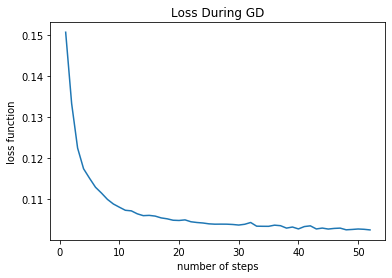

In [317]:
import matplotlib.pyplot as plt

plt.plot(classifier.loss_curve_)
plt.title('Loss During GD')
plt.ylabel('loss function')
plt.xlabel('number of steps')

In [319]:
x.shape

(1840046, 2)